### Import Necessary Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import re
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Include the Train Dataset :

In [3]:
DF = pd.read_csv('Train Data.csv')
DF

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
...,...,...,...
22574,28161,n in the world to decide what I'm going to do ...,drama
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,28165,....with marked skill and dexterity . LANA wry...,action


### Update Column Data :

In [4]:
DF.rename(columns={'id': 'ID','text':'Plot','genre':'Genre'}, inplace=True)

In [5]:
DF

,ID,Plot,Genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
...,...,...,...
22574,28161,n in the world to decide what I'm going to do ...,drama
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,28165,....with marked skill and dexterity . LANA wry...,action


In [6]:
DF['Genre'].unique()

array(['thriller', 'comedy', 'drama', 'action', 'sci-fi', 'other',
       'romance', 'horror', 'adventure'], dtype=object)

In [7]:
len(DF['Genre'].unique())

9

### Visualize the count of Genre :

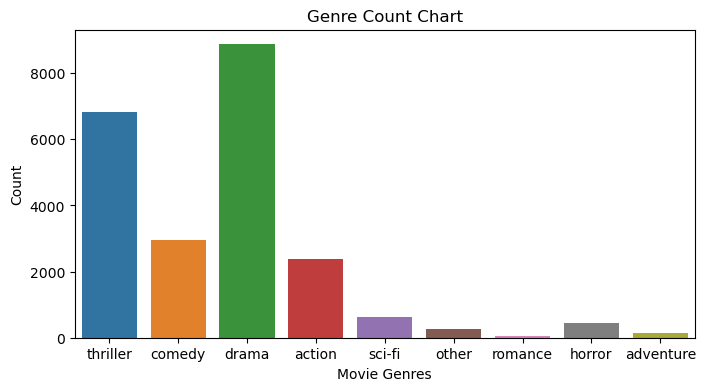

In [8]:
# Set the figure size using matplotlib
plt.figure(figsize=(8, 4))

# Create the count plot using seaborn
sns.countplot(x='Genre', data=DF)

# Set the title, x-axis label, and y-axis label
plt.title('Genre Count Chart')
plt.xlabel('Movie Genres')
plt.ylabel('Count')

# Show the plot
plt.show()

### Data Preprocessing :

In [9]:
Movie_Genre = list(DF['Genre'].unique())
Movie_Genre.sort()
Movie_Genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

### Map the genre to values :

In [10]:
Genre_Mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3,
                'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}

DF['Genre'] = DF['Genre'].map(Genre_Mapper)

In [12]:
DF

,ID,Plot,Genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
...,...,...,...
22574,28161,n in the world to decide what I'm going to do ...,4
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,4
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",8
22577,28165,....with marked skill and dexterity . LANA wry...,1


In [13]:
DF.isna()

,ID,Plot,Genre
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
22574,False,False,False
22575,False,False,False
22576,False,False,False
22577,False,False,False


In [14]:
DF.isna().any()

ID       False
Plot     False
Genre    False
dtype: bool

In [17]:
# Drop the ID column
DF.drop('ID', axis=1, inplace=True)

In [18]:
DF

,Plot,Genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,"t, summa cum laude and all. And I'm about to l...",3
2,"up Come, I have a surprise.... She takes him ...",4
3,ded by the two detectives. INT. JEFF'S APARTME...,8
4,"nd dismounts, just as the other children reach...",4
...,...,...
22574,n in the world to decide what I'm going to do ...,4
22575,shards. BOJO LAZ! Laz pushes Deke back through...,4
22576,"OTTIE You've got a thing about Ernie's, haven'...",8
22577,....with marked skill and dexterity . LANA wry...,1


### Cleaning the text :

In [21]:
Corpus = []
PS = PorterStemmer()

In [22]:
for i in range(0, DF.shape[0]):
    
    # Cleaning special character 
    Dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=DF['Plot'][i])
    
    # Convert into lower case
    Dialog = Dialog.lower()
    
    # Tokenizing 
    words = Dialog.split()
    
    # Removing the stop words
    Dialog_words = [word for word in words if word not in set(stopwords.words('english'))]
    
    # Stemming the words
    words = [PS.stem(word) for word in Dialog_words]
    
    # Joining the words
    Dialog = ' '.join(words)
    
    # Creating a corpus
    Corpus.append(Dialog)

In [23]:
Corpus

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [26]:
other_words = []
for i in list(DF[DF['Genre']==0].index):
    other_words.append(Corpus[i])

action_words = []
for i in list(DF[DF['Genre']==1].index):
    action_words.append(Corpus[i])

adventure_words = []
for i in list(DF[DF['Genre']==2].index):
    adventure_words.append(Corpus[i])
    
comedy_words = []
for i in list(DF[DF['Genre']==3].index):
    comedy_words.append(Corpus[i])

drama_words = []
for i in list(DF[DF['Genre']==4].index):
    drama_words.append(Corpus[i])

horror_words = []
for i in list(DF[DF['Genre']==5].index):
    horror_words.append(Corpus[i])

romance_words = []
for i in list(DF[DF['Genre']==6].index):
    romance_words.append(Corpus[i])

scifi_words = []
for i in list(DF[DF['Genre']==7].index):
    scifi_words.append(Corpus[i])

thriller_words = []
for i in list(DF[DF['Genre']==8].index):
    thriller_words.append(Corpus[i])

In [27]:
other = ''
action = ''
adventure = ''
comedy = ''
drama = ''
horror = ''
romance = ''
scifi = ''
thriller = ''

In [30]:
for i in range(0, 10):
    other += other_words[i]
    action += action_words[i]
    adventure += adventure_words[i]
    comedy += comedy_words[i]
    drama += drama_words[i]
    horror += horror_words[i]
    romance += romance_words[i]
    scifi += scifi_words[i]
    thriller += thriller_words[i]

### Creating Wordcloud for Genre :

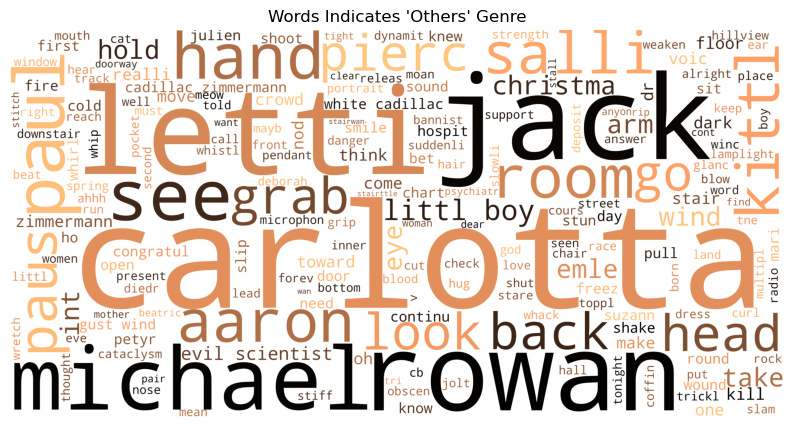

In [44]:
Wordcloud1 = WordCloud(background_color='white',colormap = 'copper', width=5000, height=2500).generate(other)
plt.figure(figsize=(10,8))
plt.imshow(Wordcloud1)
plt.axis('off')
plt.title("Words Indicates 'Others' Genre")
plt.show()

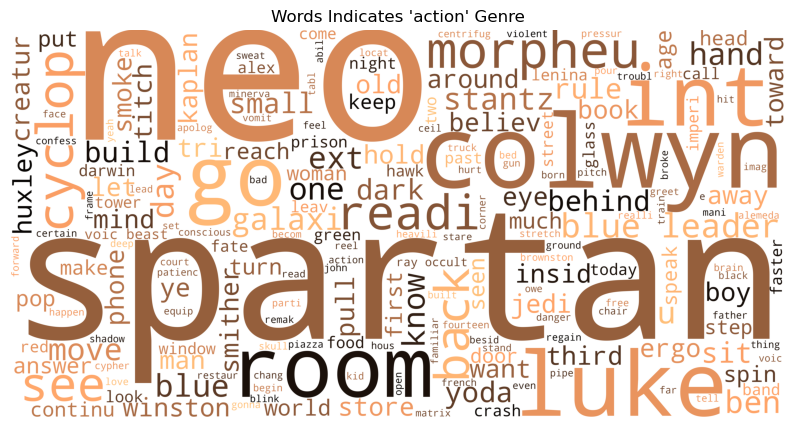

In [45]:
Wordcloud2 = WordCloud(background_color='white',colormap = 'copper', width=5000, height=2500).generate(action)
plt.figure(figsize=(10,8))
plt.imshow(Wordcloud2)
plt.axis('off')
plt.title("Words Indicates 'action' Genre")
plt.show()

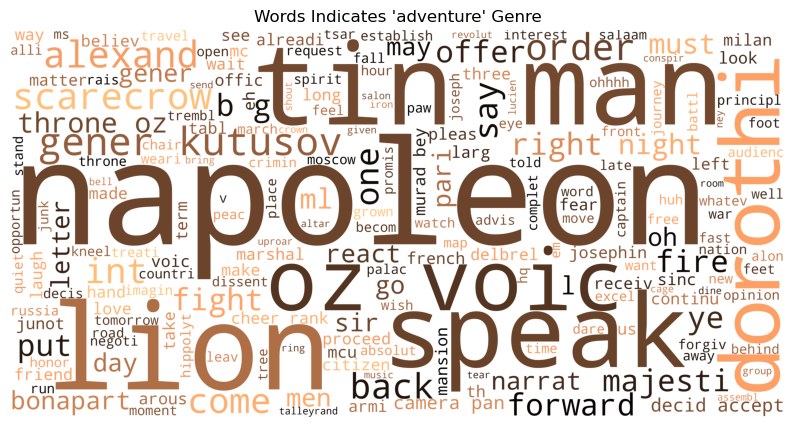

In [46]:
Wordcloud3 = WordCloud(background_color='white',colormap = 'copper', width=5000, height=2500).generate(adventure)
plt.figure(figsize=(10,8))
plt.imshow(Wordcloud3)
plt.axis('off')
plt.title("Words Indicates 'adventure' Genre")
plt.show()

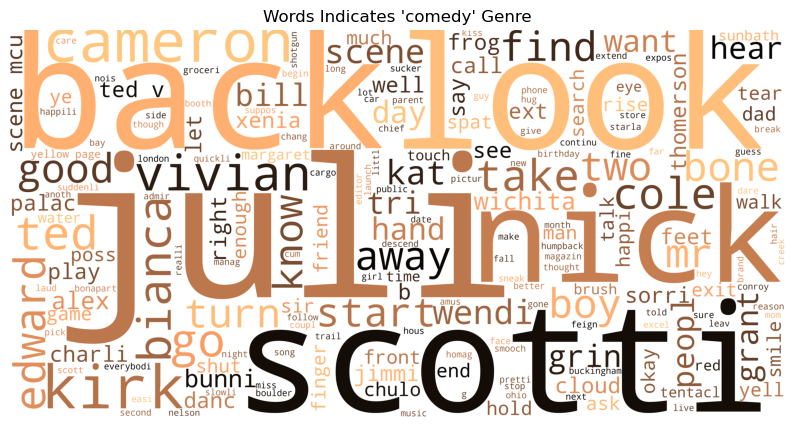

In [47]:
Wordcloud4 = WordCloud(background_color='white',colormap = 'copper', width=5000, height=2500).generate(comedy)
plt.figure(figsize=(10,8))
plt.imshow(Wordcloud4)
plt.axis('off')
plt.title("Words Indicates 'comedy' Genre")
plt.show()

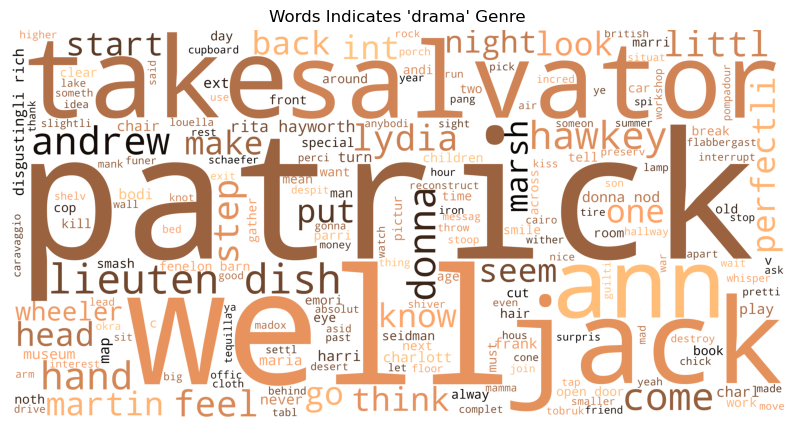

In [48]:
Wordcloud5 = WordCloud(background_color='white',colormap = 'copper', width=5000, height=2500).generate(drama)
plt.figure(figsize=(10,8))
plt.imshow(Wordcloud5)
plt.axis('off')
plt.title("Words Indicates 'drama' Genre")
plt.show()

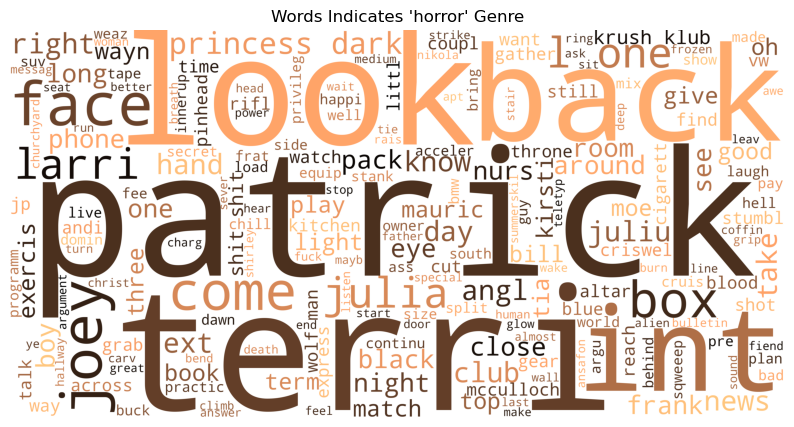

In [49]:
Wordcloud6 = WordCloud(background_color='white',colormap = 'copper', width=5000, height=2500).generate(horror)
plt.figure(figsize=(10,8))
plt.imshow(Wordcloud6)
plt.axis('off')
plt.title("Words Indicates 'horror' Genre")
plt.show()

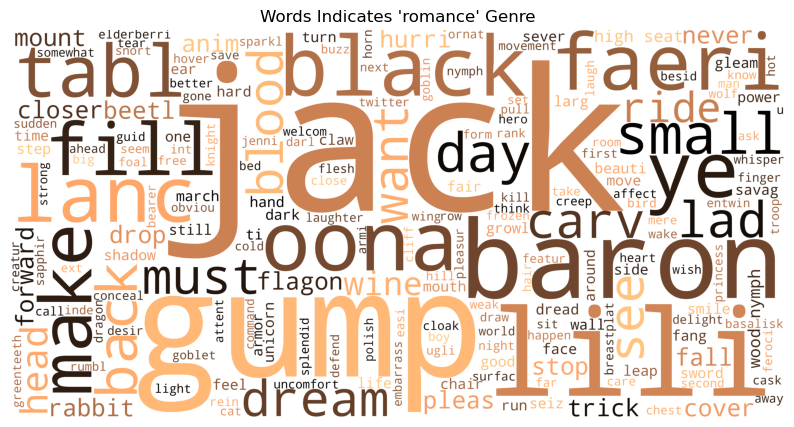

In [50]:
Wordcloud7 = WordCloud(background_color='white',colormap = 'copper', width=5000, height=2500).generate(romance)
plt.figure(figsize=(10,8))
plt.imshow(Wordcloud7)
plt.axis('off')
plt.title("Words Indicates 'romance' Genre")
plt.show()

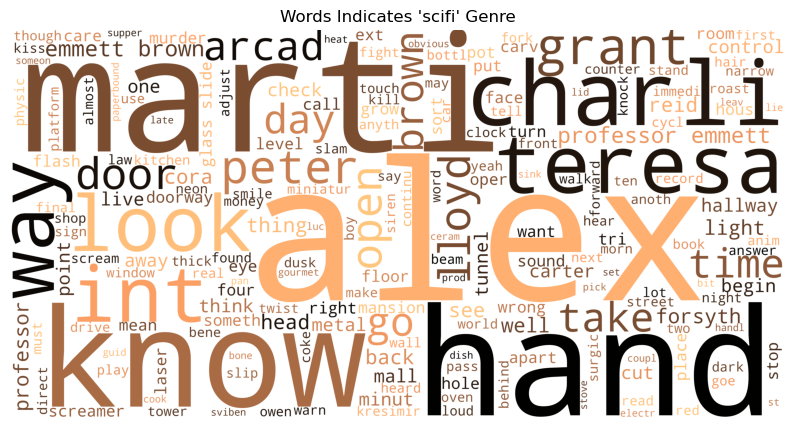

In [51]:
Wordcloud8 = WordCloud(background_color='white',colormap = 'copper', width=5000, height=2500).generate(scifi)
plt.figure(figsize=(10,8))
plt.imshow(Wordcloud8)
plt.axis('off')
plt.title("Words Indicates 'scifi' Genre")
plt.show()

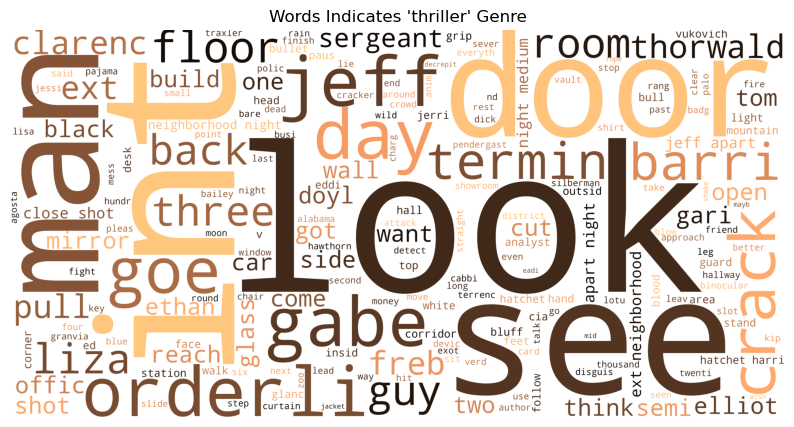

In [52]:
Wordcloud9 = WordCloud(background_color='white',colormap = 'copper', width=5000, height=2500).generate(thriller)
plt.figure(figsize=(10,8))
plt.imshow(Wordcloud9)
plt.axis('off')
plt.title("Words Indicates 'thriller' Genre")
plt.show()

### Creating the Bag of Words Model :

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
CV = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = CV.fit_transform(Corpus).toarray()

In [55]:
Y = DF['Genre'].values

In [56]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
Y

array([8, 3, 4, ..., 8, 1, 3], dtype=int64)

### Build the Model :

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [60]:
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


### Fitting Naive Bayes to the Training Set :

In [61]:
from sklearn.naive_bayes import MultinomialNB

In [62]:
NB_Classifier = MultinomialNB()
NB_Classifier.fit(X_train, Y_train)

MultinomialNB()

### Predicting the Test Set :

In [63]:
NB_Y_Pred = NB_Classifier.predict(X_test)

In [64]:
NB_Y_Pred

array([1, 4, 1, ..., 8, 4, 8], dtype=int64)

### Calculating Accuracy :

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
score1 = accuracy_score(Y_test, NB_Y_Pred)

print("--------- Score ---------")
print("Accuracy score is: {}%".format(round(score1*100,2)))

--------- Score ---------
Accuracy score is: 89.57%


### Make Predictions :

In [72]:
def Genre_Prediction(Script):
    Script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=Script)
    Script = Script.lower()
    Script_words = Script.split()
    Script_words = [word for word in Script_words if not word in set(stopwords.words('english'))]
    PS = PorterStemmer()
    Final_Script = [ps.stem(word) for word in Script_words]
    Final_Script = ' '.join(Final_Script)
    Temp = CV.transform([Final_Script]).toarray()
    return NB_Classifier.predict(Temp)[0]

### Include the Test Dataset :

In [73]:
Test = pd.read_csv('Test Data.csv')
Test

,id,text
0,1,glances at her. BOOK Maybe I ought to learn t...
1,8,hout breaking stride. Tatiana sees her and can...
2,13,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,24,take myself. BRANDON How bad is the other thi...
4,38,"her body to shield his own. KAY Freeze it, Bug..."
...,...,...
5584,28140,Crazy Love script by Carol Watson COMMITTED f...
5585,28142,"break? You folks don't need a break, you need..."
5586,28154,egain control of his battered psyche. LIVIA Ca...
5587,28164,"t BEN GRIMM. A normal man. He smiles wide, sha..."


### Drop the ID Column :

In [74]:
Test.drop('id', axis=1, inplace=True)

In [75]:
Test

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
...,...
5584,Crazy Love script by Carol Watson COMMITTED f...
5585,"break? You folks don't need a break, you need..."
5586,egain control of his battered psyche. LIVIA Ca...
5587,"t BEN GRIMM. A normal man. He smiles wide, sha..."


### In the Test Dataset pick the data randomly and make predictions :

In [78]:
from random import randint

In [82]:
Row = randint(0,Test.shape[0]-1)
Script = Test.text[Row]

print('Script : ',Script)
Result = Genre_Prediction(Script)
print('\n\t\t\t\t\t\t Prediction : ',list(Genre_Mapper.keys())[Result])

Script :   GIRL ON PHONE Was it Teddy? CICI No, some creep asshole trying to scare me. GIRL ON PHONE It's hell week. Chill. The movie murders have brought out the crazies. It's nothing. BUMP! A noise from upstairs. Cici spins around to the staircase. CICI Shit. GIRL ON PHONE What is it? CICI I heard a noise. GIRL ON PHONE Where? CICi Upstairs. BUMP! Something moves upstairs. It sounds almost like footsteps. CICI Shit. Cici moves to the staircase. She peers up it. CICI cont'd calling out Hello? Hello? GIRL ON PHONE ala Friday the 13th Kill, kill, kill, kill, hah, hah, hah, hah... CICI Stop it... GIRL ON PHONE I can't believe you're alone in that house. Cici looks up the staircase again. CICI soft whisper I don't think I'm alone. Floorboards CREAK above her. Cici freaks. CICI I'm outta here. She flies to the door, unlocking it, throwing it open. She moves out onto the... EXT. FRONT PORCH SAME A wooden porch with a bulb glowing overhead. She stands on the porch steps, looking back, throug

### Our Custom Plot Summary and make prediction :

In [83]:
Script = input("Enter Script  : ")

print('Script : ',Script)
Result = Genre_Prediction(Script)
print('\n\t\t\t\t\t\t Prediction : ',list(Genre_Mapper.keys())[Result])

Enter Script  : GIRL ON PHONE Was it Teddy? CICI No, some creep asshole trying to scare me. GIRL ON PHONE It's hell week. Chill. The movie murders have brought out the crazies. It's nothing. BUMP! A noise from upstairs. Cici spins around to the staircase. CICI Shit. GIRL ON PHONE What is it? CICI I heard a noise. GIRL ON PHONE Where? CICi Upstairs. BUMP! Something moves upstairs. It sounds almost like footsteps. CICI Shit. Cici moves to the staircase. She peers up it. CICI cont'd calling out Hello? Hello? GIRL ON PHONE ala Friday the 13th Kill, kill, kill, kill, hah, hah, hah, hah... CICI Stop it... GIRL ON PHONE I can't believe you're alone in that house. Cici looks up the staircase again. CICI soft whisper I don't think I'm alone. Floorboards CREAK above her. Cici freaks. CICI I'm outta here. She flies to the door, unlocking it, throwing it open. She moves out onto the... EXT. FRONT PORCH SAME A wooden porch with a bulb glowing overhead. She stands on the porch steps, looking back, t

In [88]:
Script = input("Enter Script  : ")

print('Script : ',Script)
Result = Genre_Prediction(Script)
print('\n\t\t\t\t\t\t Prediction : ',list(Genre_Mapper.keys())[Result])

Enter Script  : The story of American scientist J. Robert Oppenheimer and his role in the development of the atomic bomb.
Script :  The story of American scientist J. Robert Oppenheimer and his role in the development of the atomic bomb.

						 Prediction :  thriller
